<h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις μετρικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες τεχνικές που έχουν ως στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [1]:
%matplotlib inline

import matplotlib
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Η κατανομή της κεντρικότητας εγγύτητας και η μέση κεντρικότητα εγγύτητας κάθε τοπολογίας.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες</a></caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Game of Thrones - season 5</td>
    <td style=text-align:left><a style=text-decoration:none href='https://networkofthrones.wordpress.com/the-series/season-5/'>GoT</a></td>
    <td style=text-align:left><p style=text-align:justify> The season 5 <b>GoT</b> network represents the interactions between the characters of Game of Thrones in season 5. The season 5 network has 118 nodes (characters) and 394 weighted edges, corresponding to 5,139 interactions. Data can be found here: <a style=text-decoration:none href='https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv'>GoT_data</a></p>
</tr> 
<tr>
    <td style=text-align:left>email-Eu-core</td>
    <td style=text-align:left><a style=text-decoration:none href='https://snap.stanford.edu/data/email-Eu-core.html'>email-eu-core</a></td>
    <td style=text-align:left><p style=text-align:justify> The network <b>email-Eu-core</b> was generated using email data from a large European research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core) and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. The dataset also contains "ground-truth" community memberships of the nodes. Each individual belongs to exactly one of 42 departments at the research institute. </p>
</tr> 
    
</table>

<h4>Παραγωγή συνθετικών τοπολογιών</h4> 
<p>Προσοχή! Τα δίκτυα που θα παράξετε θα πρέπει να είναι συνδεδεμένα.</p>

In [2]:
n=80
d=4
M=300
R=0.25
p=0.3
k=4
seedno=5
random.seed(seedno)

REG: nx.Graph = nx.watts_strogatz_graph(n, d, p=0)  # probability of replacing ring nodes is zero
REG.graph['name'] = 'REG'
RGER: nx.Graph = nx.gnm_random_graph(n, M) # regualar graph
RGER.graph['name'] = 'RGER'
RGG: nx.Graph = nx.random_geometric_graph(n, R)  # 2 nodes joined by an edge if distance is at most radius R
RGG.graph['name'] = 'RGG'
SF: nx.Graph = nx.barabasi_albert_graph(n, d) # new nodes each with d edges preferntially attached to existing nodes with high degree
SF.graph['name'] = 'SF'
SW: nx.Graph = nx.watts_strogatz_graph(n, d, p)  # ring of n nodes initially. Each node then joined to its d nearest neighbors
# then, some edges are replaced with probability p with new ones with the ending node chosen uniformly at random  
SW.graph['name'] = 'SW'


In [3]:
synthetic_graphs: dict[str, nx.Graph] = {
    "REG": REG,
    "RGER": RGER,
    "RGG": RGG,
    "SF": SF,
    "SW": SW
}

print("Graph\tNodes\tEdges")
for g_name, graph in synthetic_graphs.items():
    print(f"{g_name}\t{graph.number_of_nodes()}\t{graph.number_of_edges()}")

Graph	Nodes	Edges
REG	80	160
RGER	80	300
RGG	80	560
SF	80	304
SW	80	160


In [5]:
# check if networks generated are connnected

print('Graph\t\tConnected')
for g_name, graph in synthetic_graphs.items():
    print(f"{g_name}\t\t{nx.is_connected(graph)}")

Graph		Connected
REG		True
RGER		True
RGG		True
SF		True
SW		True


We have found out that all the examined topologies are connected graphs.

<h4>Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

In [6]:
#football network
football: nx.Graph = nx.read_gml(r"football.gml")
football.graph['name'] = 'Football'

In [7]:
#Game of thrones network
import csv
got: nx.Graph = nx.Graph()
got.graph['name'] = 'GOT'
with open('got_s5.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_reader)
    for row in csv_reader:
        got.add_edge(row[0],row[1])
        line_count += 1

#### Προσοχή! Θα μελετήσετε τη μεγαλύτερη συνδεδεμένη συνιστώσα του δικτύου email-Eu-core, αφού πρώτα αφαιρέσετε τα self-loops. Μπορείτε να κάνετε χρήση των συναρτήσεων connected_components, subgraph, remove_edges_from του networkx.

In [69]:
#email-Eu-core network
eu: nx.DiGraph = nx.read_edgelist("email-Eu-core.txt",create_using=nx.Graph())
eu.graph['name'] = 'Email-EU'

In [70]:
real_graphs: dict[str, nx.Graph] = {
    "fb": football,
    "got": got,
    "eu": eu
    }

print("Graph\tNodes\tEdges")
for g_name, graph in real_graphs.items():
    print(f"{g_name}\t{graph.number_of_nodes()}\t{graph.number_of_edges()}")

Graph	Nodes	Edges
fb	115	613
got	119	396
eu	1005	16706


In [71]:
def find_self_loops(G: nx.Graph) -> list[tuple]:
    iterable = G.edges
    loops = list()
    for edge in G.edges:
        node1, node2 = edge[0], edge[1]
        if node1 == node2:
            loops.append(edge)
    print(f"Graph: {G.graph['name']}\nSelf loops = {len(loops)}")
    return loops

In [72]:
eu_self_loops = find_self_loops(eu)

Graph: Email-EU
Self loops = 642


In [73]:
eu_no_loops: nx.DiGraph = eu.copy()
eu_no_loops.remove_edges_from(ebunch=eu_self_loops)

In [74]:
print(f"Graph: {eu.graph['name']}")
print(f"Initial graph edges = {len(eu.edges)}")
print(f"Self loops = {len(eu_self_loops)}")
print(f"Edges after removing self loops = {len(eu_no_loops.edges)}")

Graph: Email-EU
Initial graph edges = 16706
Self loops = 642
Edges after removing self loops = 16064


In [81]:
con_components = sorted(nx.connected_components(eu_no_loops), key=len, reverse=True)

eu_no_loops_largest_con_component_set: set = con_components[0]
eu2: nx.DiGraph = eu_no_loops.subgraph(eu_no_loops_largest_con_component_set) # graph of the largest component of eu without any loops 
eu2.graph['name'] = f"{eu.graph['name']} no-loops largest component"
print(f"{eu2.graph['name']} has {eu2.number_of_nodes()} nodes and {eu2.number_of_edges()} edges.")

Email-EU no-loops largest component has 986 nodes and 16064 edges.


In [83]:
real_graphs: dict[str, nx.Graph] = {
    "fb": football,
    "got": got,
    "eu2": eu2
    }

print("Graph\tNodes\tEdges")
for g_name, graph in real_graphs.items():
    print(f"{g_name}\t{graph.number_of_nodes()}\t{graph.number_of_edges()}")

Graph	Nodes	Edges
fb	115	613
got	119	396
eu2	986	16064


<h4>Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

In [89]:
node_styling = {
    "node_color": "midnightblue",
    "edge_color": "blue",
    "node_size": 200
}

def draw_circular_graph(G: nx.Graph, node_styling: dict = node_styling, figsize=(10,10)):
    G_name = G.graph['name']
    fig, ax = plt.subplots(figsize=figsize)
    nx.draw_circular(G, **node_styling, ax=ax)
    ax.axis("equal")
    plt.title(f"Graph: {G_name}")
    plt.show()


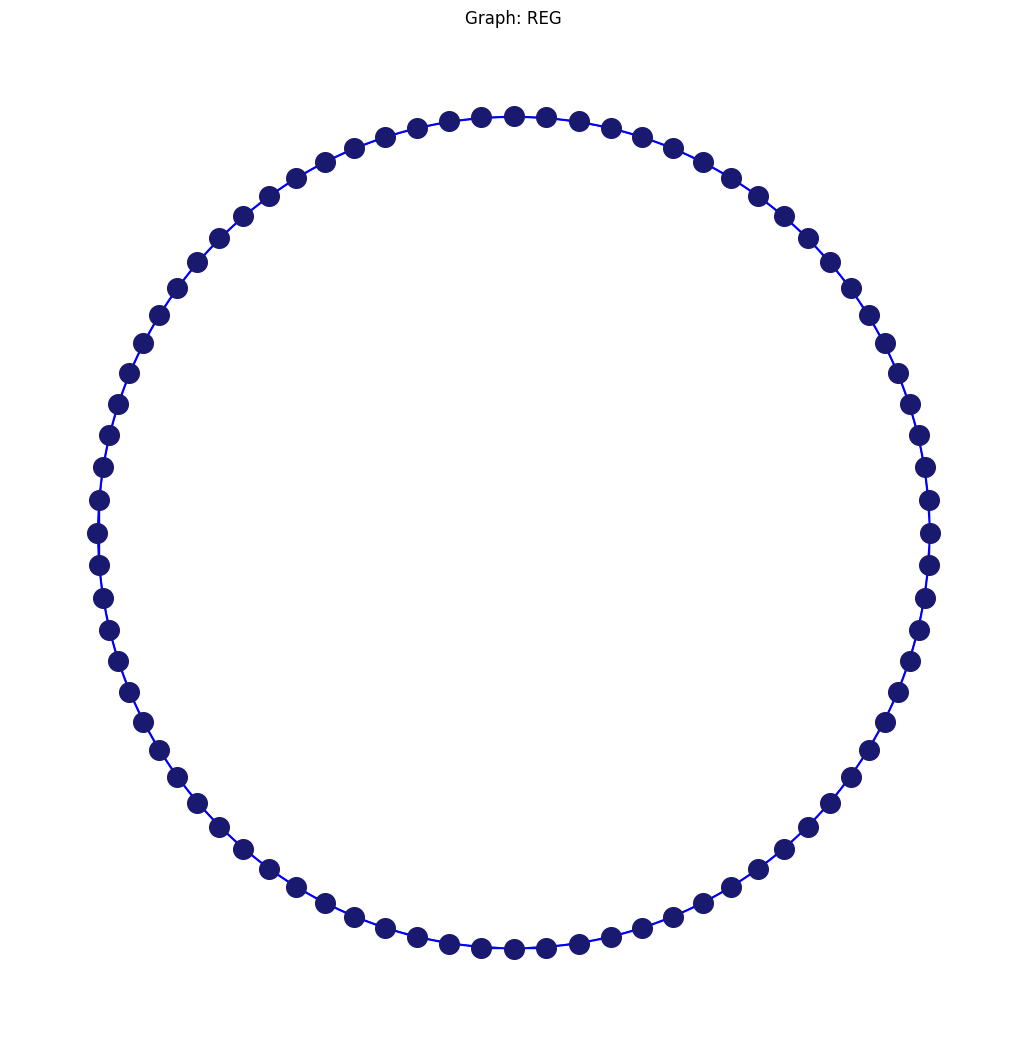

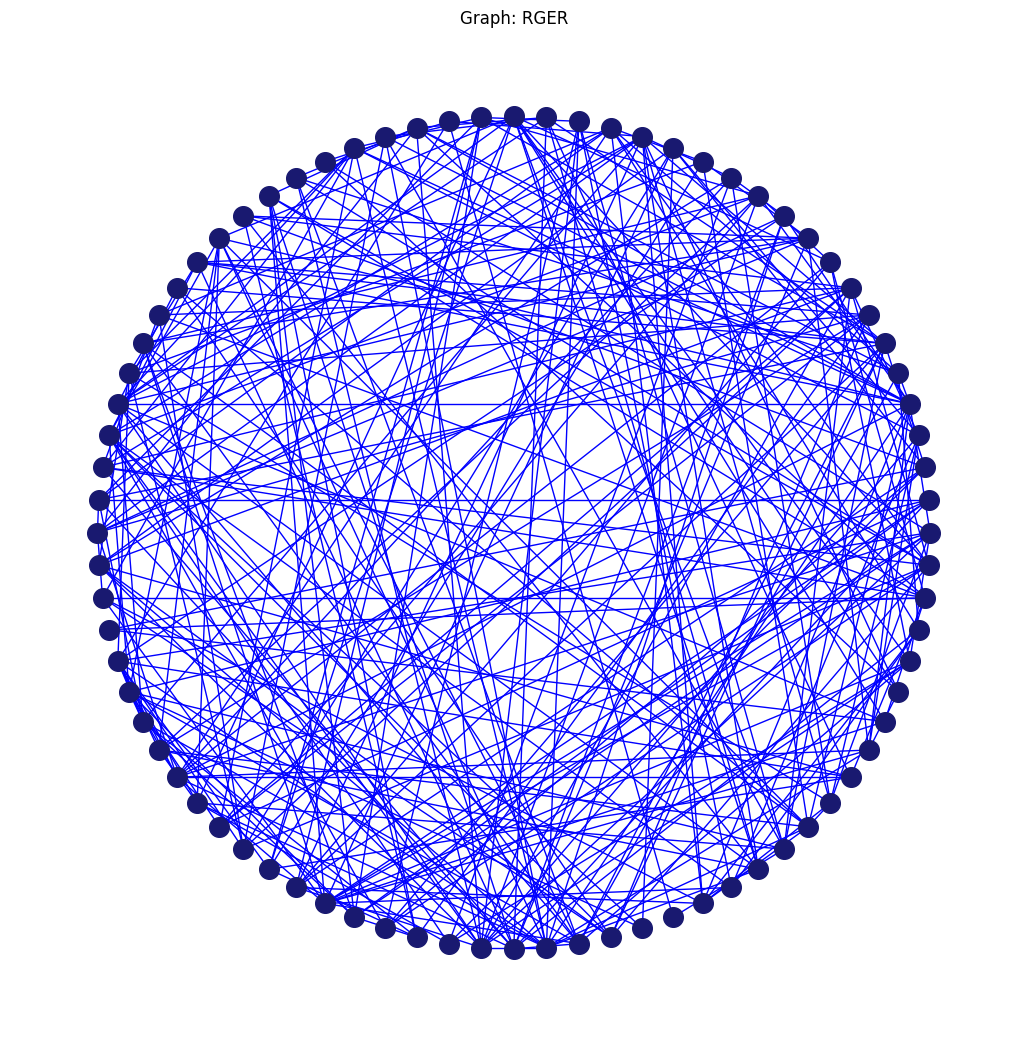

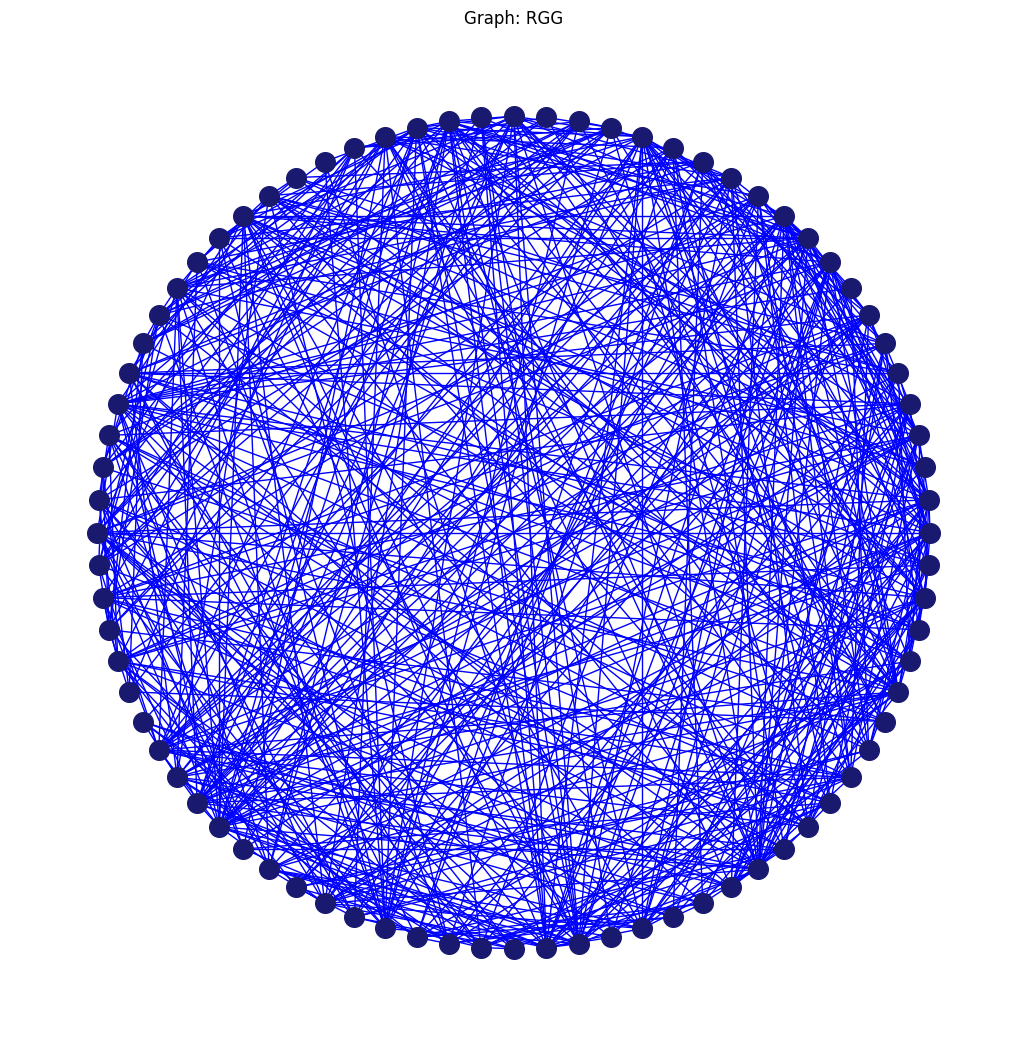

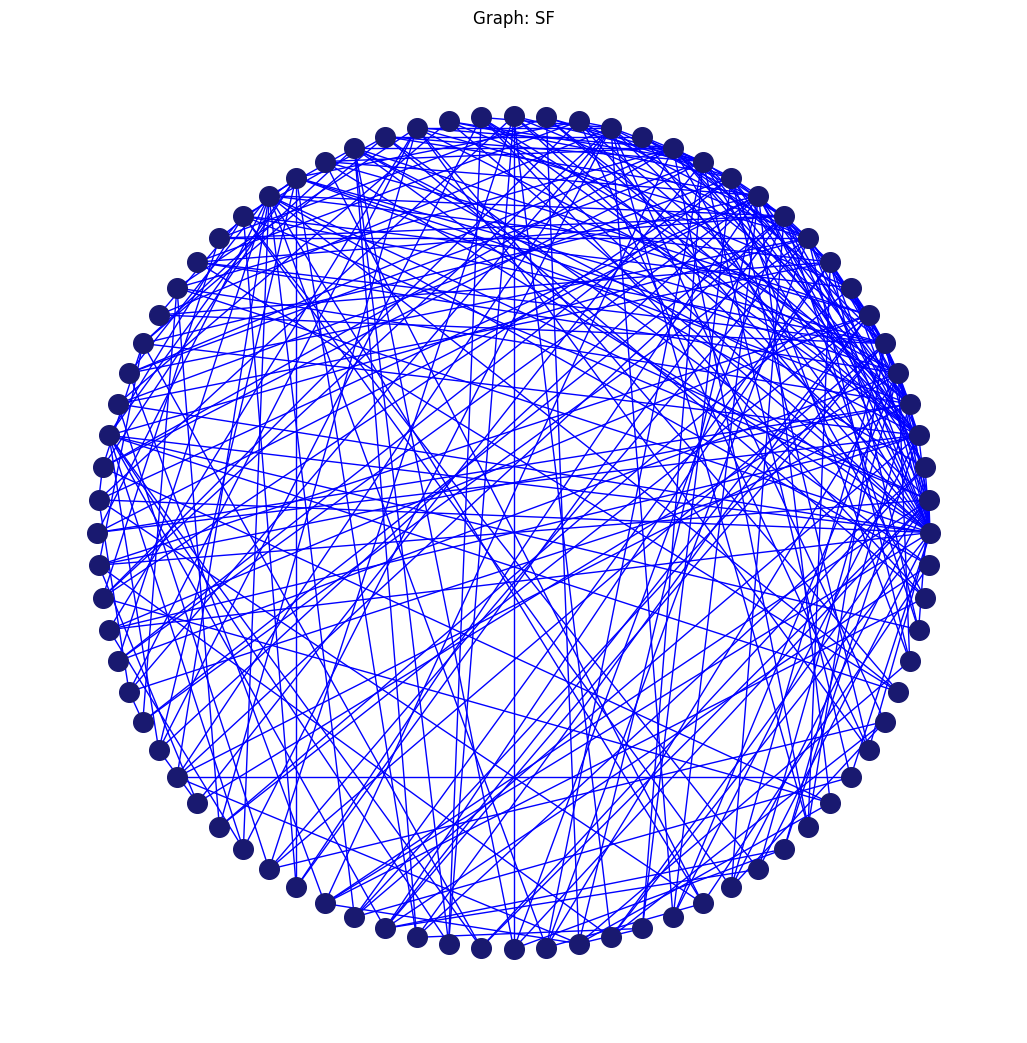

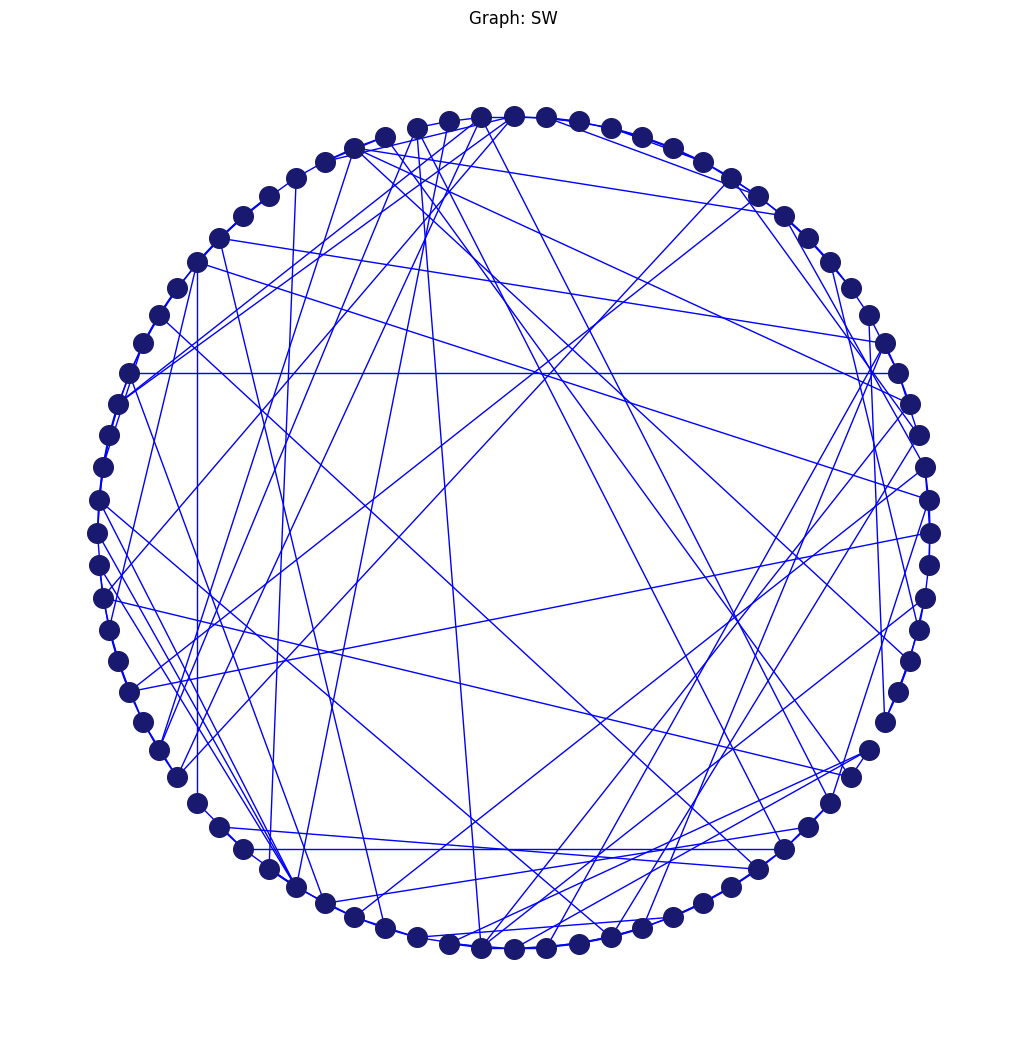

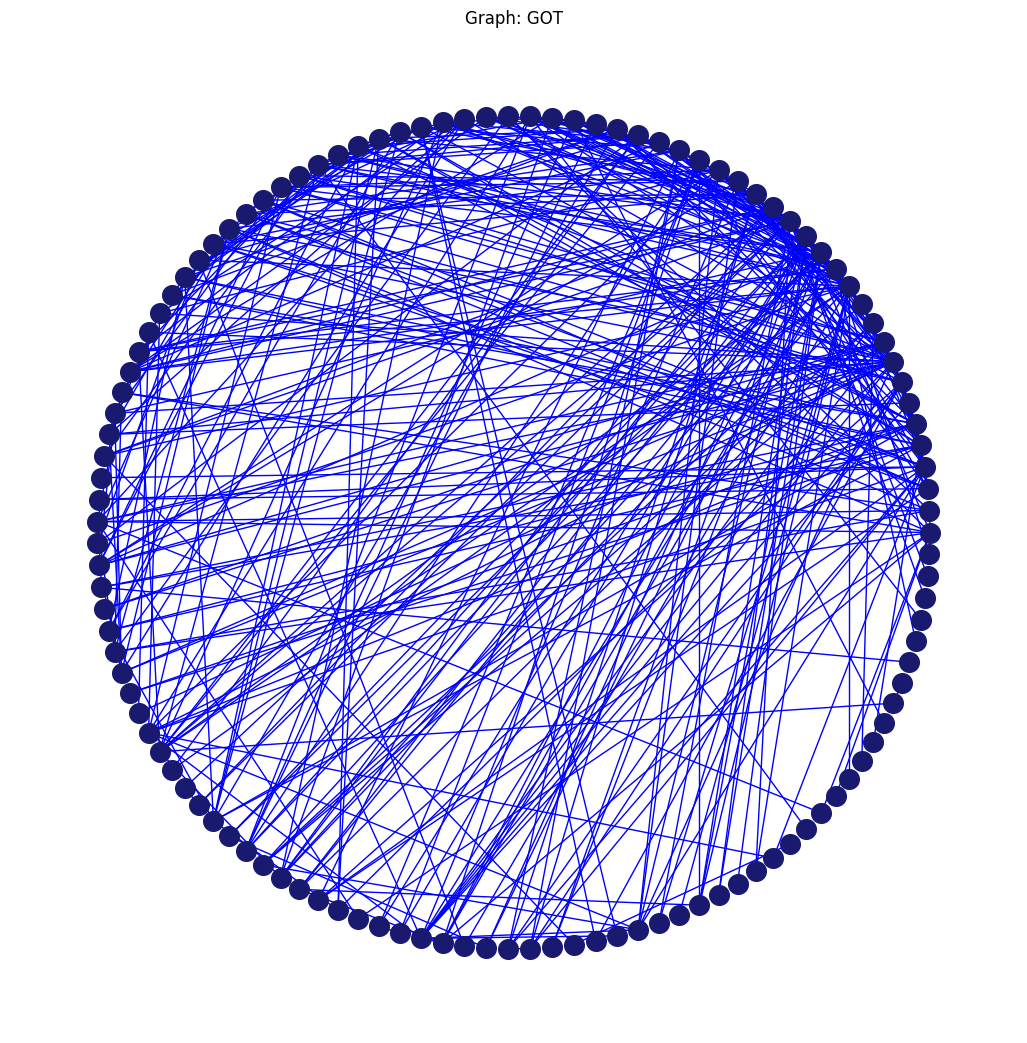

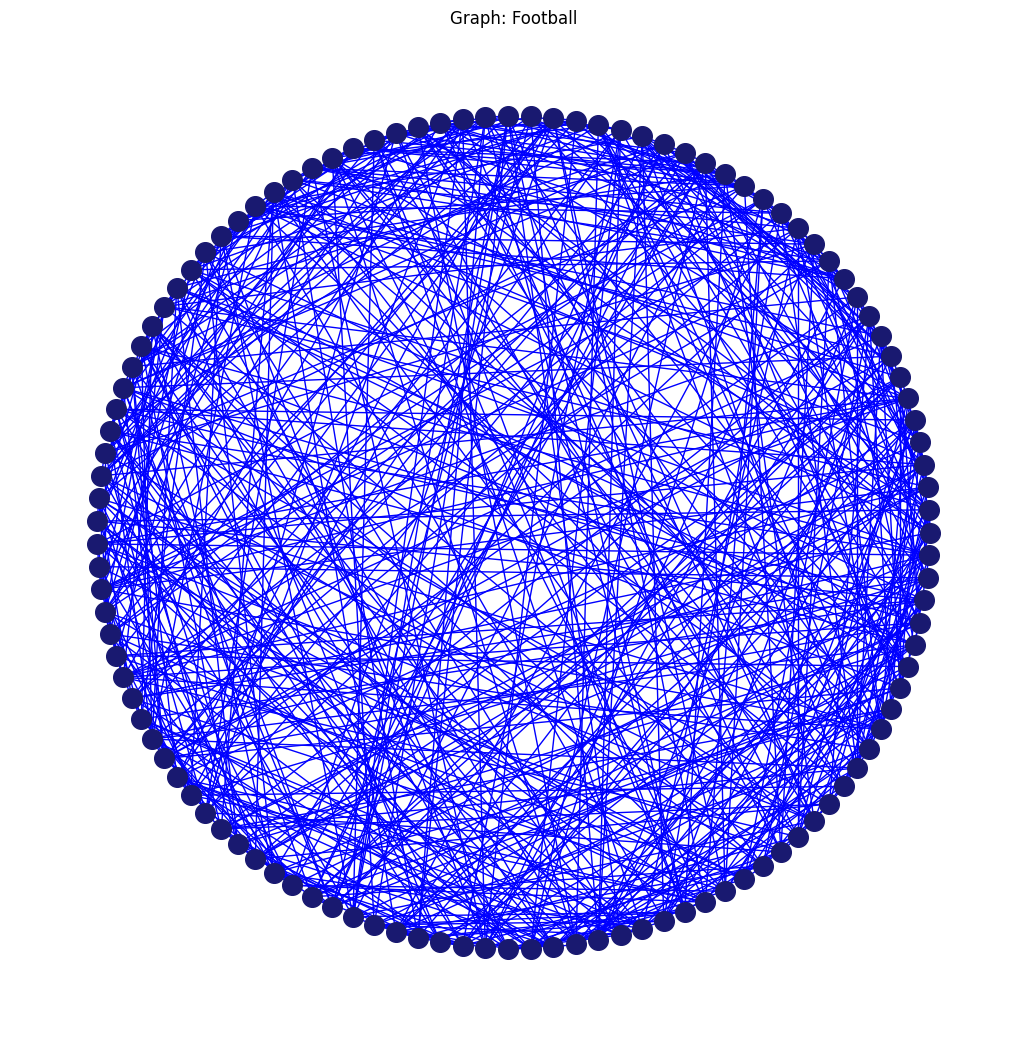

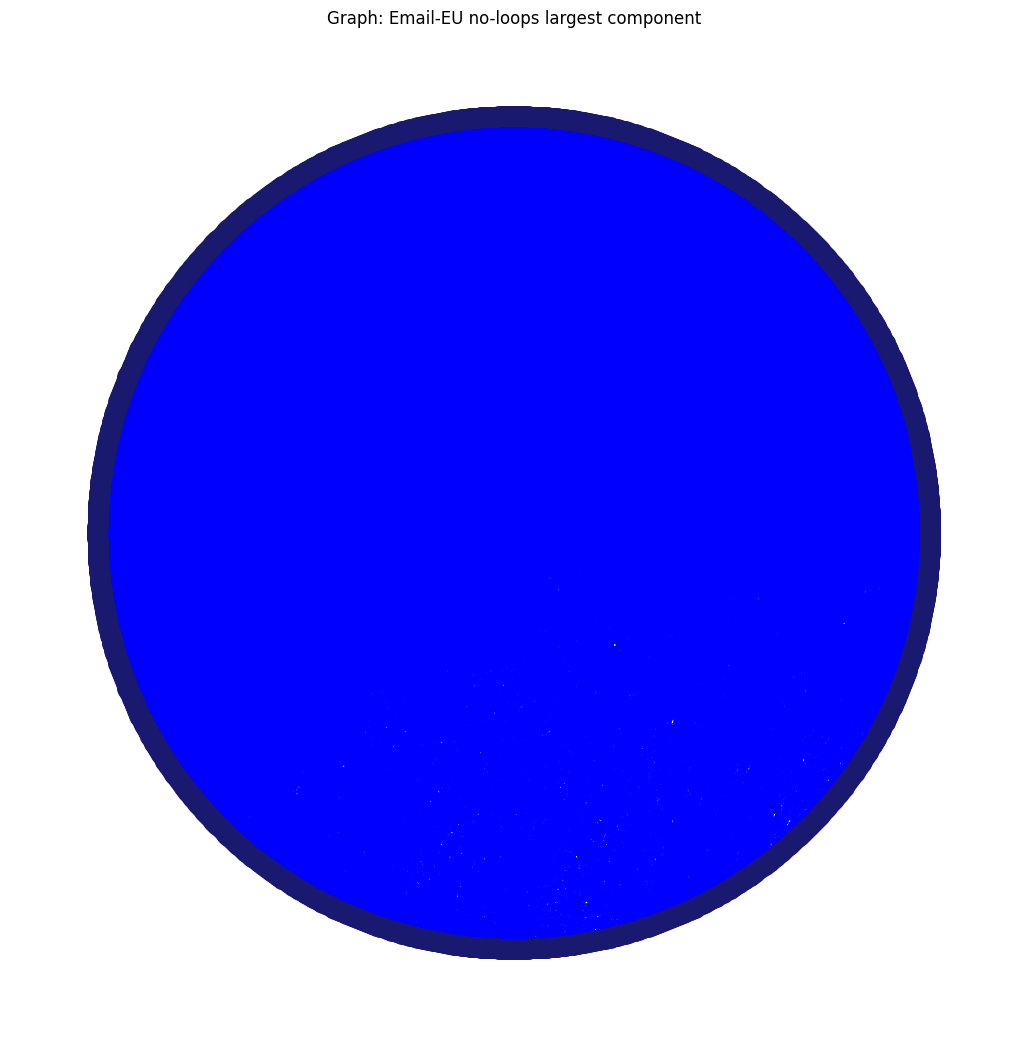

In [96]:
figsize = (13,13)
draw_circular_graph(REG, figsize=figsize)
draw_circular_graph(RGER, figsize=figsize)
draw_circular_graph(RGG, figsize=figsize)
draw_circular_graph(SF, figsize=figsize)
draw_circular_graph(SW, figsize=figsize)
draw_circular_graph(got, figsize=figsize)
draw_circular_graph(football, figsize=figsize)
draw_circular_graph(eu2, figsize=figsize)

Given the large amount of nodes and especially edges for the **Email-EU** graph, we can see that we cannot get a clear picture within the graph shown given the density of nodes and edges.
It's clear, however, that the **GOT** graph looks more like a SF graph, whereas the **Football** graph is unclear whether it looks like an RGG, a SW or none of those - given the density of the graph we cannot really tell for sure.

In [116]:
def find_degree(G: nx.Graph, n_bins='auto', verbose=True, hist=True, shared_hist=False):
    """
    Default mode is verbose=True, hist=True that prints information on the node degrees of the graph
    and also returns them along with a histogram.
    The 2nd mode is the shared_hist=True where nothing is returned and a common histogram plot can be created.
    """
    G_name: str = G.graph['name'] # name attribute of the nx.Graph object
    n = nx.number_of_nodes(G) # nodes number

    # histogram of node degree
    node_degrees: list = [G.degree(node) for node in G.nodes]
    nodes_degrees_np: np.array = np.array(node_degrees)
    avg_degree = np.mean(nodes_degrees_np)
    var_degree = np.var(nodes_degrees_np)

    # prints
    if verbose:
        print(f"Graph: {G_name}")  # show name of graph
        print(f"Average node degree = {avg_degree:.3f}, variance = {var_degree:.3f}")

    if hist:
        plt.hist(node_degrees, bins=n_bins, label=G_name, alpha=0.8) # histogram of local node degree. Binning strategy 'auto' is the max of 'sturges' and 'fd' estimators providing good all around performance.
        plt.title(f"Node degree distribution histogram")
        plt.xlabel("Node degree")
        plt.ylabel("Number of nodes (absolute frequency)")
    
    if not shared_hist: # if in shared hist mode just create the shared histogram and don't return something
        plt.title(f"{G_name} node degree distribution histogram")
        return hist

Graph: REG
Average node degree = 4.000, variance = 0.000


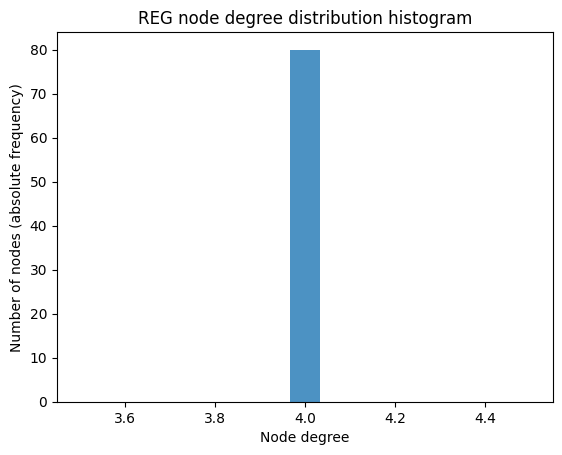

Graph: RGER
Average node degree = 7.500, variance = 7.025


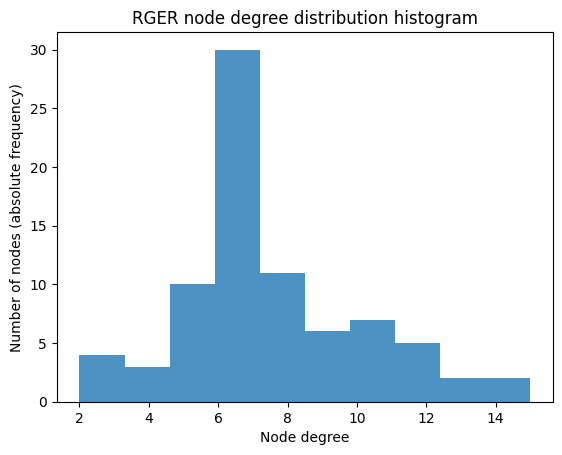

Graph: RGG
Average node degree = 14.000, variance = 30.250


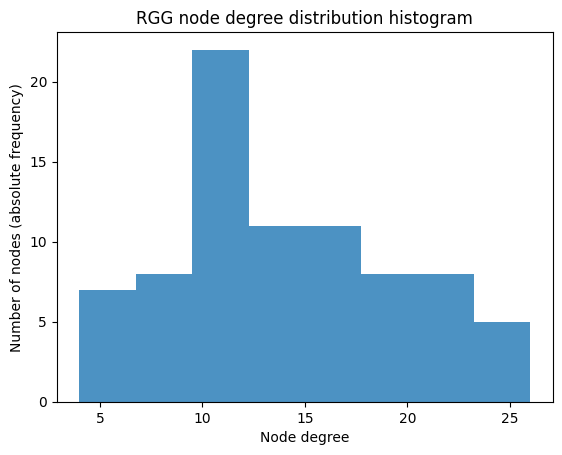

Graph: SF
Average node degree = 7.600, variance = 23.340


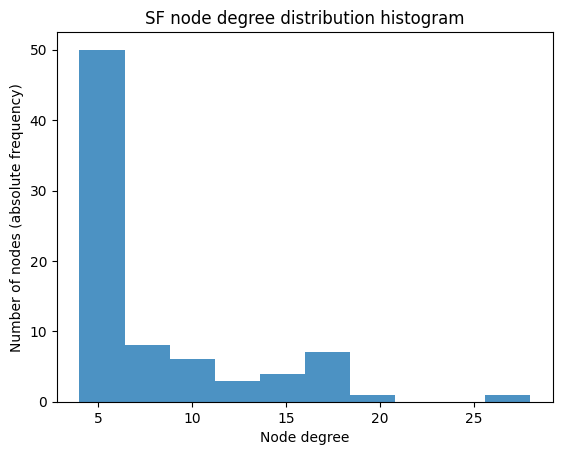

Graph: SW
Average node degree = 4.000, variance = 1.025


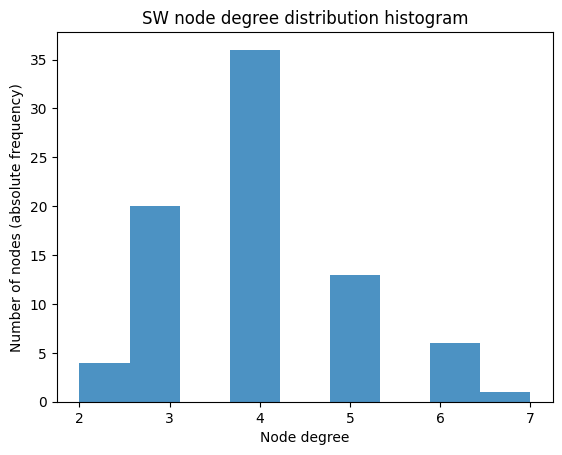

Graph: GOT
Average node degree = 6.655, variance = 31.049


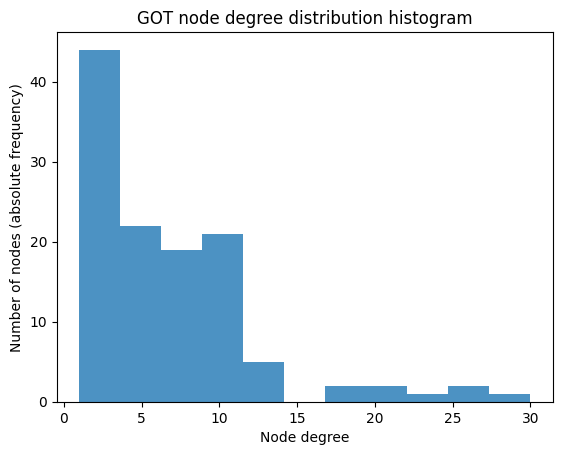

Graph: Football
Average node degree = 10.661, variance = 0.781


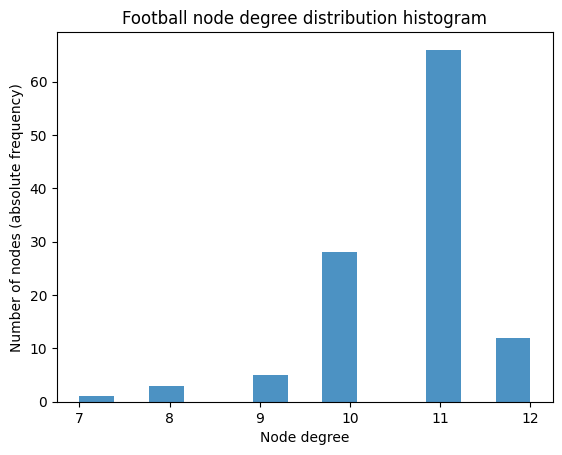

Graph: Email-EU no-loops largest component
Average node degree = 32.584, variance = 1370.888


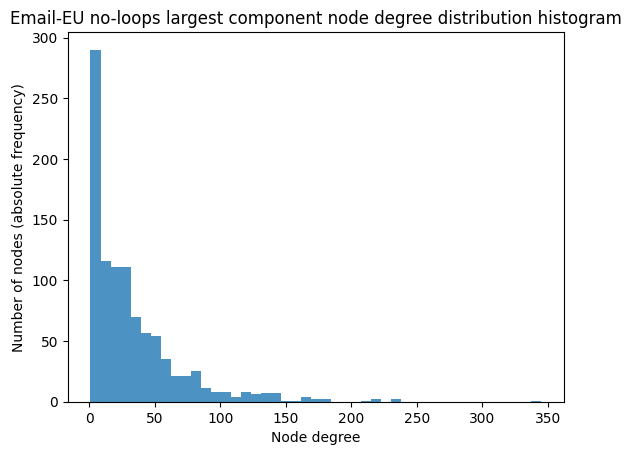

In [120]:
graphs: tuple[nx.Graph] = (REG, RGER, RGG, SF, SW, got, football, eu2)
graphs_names: list[str] = (G.graph['name'] for G in graphs)

for graph in graphs:
    plt.figure()
    if graph == REG:
        histogram_plot = find_degree(graph, n_bins=15) # for the REG graph use 15 bins instead of automatically defining them, otherwise a single bin is used by the 'auto' option set as default value in the function
    else:
        histogram_plot = find_degree(graph)
    plt.show()

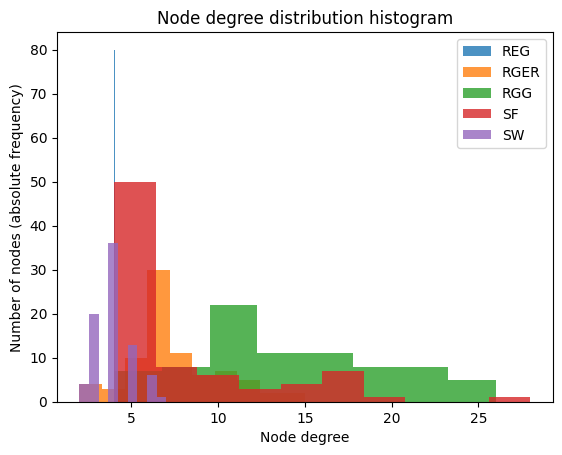

In [133]:
graphs: tuple[nx.Graph] = (REG, RGER, RGG, SF, SW)
graphs_names: list[str] = (G.graph['name'] for G in graphs)

for graph in graphs:
    if graph == REG:
        find_degree(graph, n_bins=15, verbose=False, shared_hist=True) # for the REG graph use 15 bins instead of automatically defining them, otherwise a single bin is used by the 'auto' option set as default value in the function
    else:
        find_degree(graph, verbose=False, shared_hist=True)
plt.legend()
plt.show()

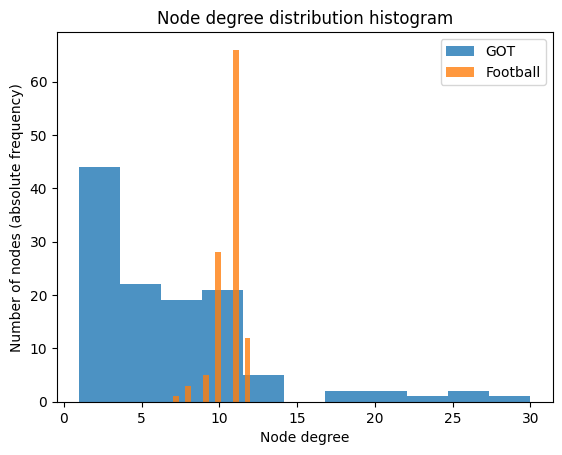

In [134]:
graphs: tuple[nx.Graph] = (got, football)
graphs_names: list[str] = (G.graph['name'] for G in graphs)

for graph in graphs:
    find_degree(graph, verbose=False, shared_hist=True)
plt.legend()
plt.show()

<h4>Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

<h4>Μελέτη κεντρικότητας εγγύτητας για πραγματικές και συνθετικές τοπολογίες </h4>

<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<ol>
<li>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο,</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<li>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία αξιολογήστε την ποιότητα της διαμέρισης με τις μετρικές performance και modularity (<a style=text-decoration:none href='https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.quality'>measuring_partitions</a>). Για την μετρική performance, θα χρησιμοποιήσετε την συνάρτηση partition_quality του networkx.</li>
<li>Για την μεγαλύτερη συνδεδεμένη συνιστώσα του email-Eu-core, να συγκρίνετε την ground-truth διαμέριση που δίνεται στο αρχείο Email-Eu-core-department-labels.txt με τις διαμερίσεις που προκύπτουν από τις εξεταζόμενες μεθόδους ως προς το πλήθος των παραγόμενων κοινοτήτων και ως προς τις μετρικές performance και modularity. </li>
<li>Για την παρακολούθηση του χρόνου εκτέλεσης της υλοποίησής σας, μπορείτε να χρησιμοποιήσετε τις βιωλιοθήκες <a style=text-decoration:none href='https://tqdm.github.io/'>tqdm</a> και <a style=text-decoration:none href='https://docs.python.org/3/library/time.html'>time</a> . Στο σχολιασμό σας να λάβετε υπόψη το trade-off της ποιότητας της διαμέρισης και του χρόνου εκτέλεσης των εξεταζόμενων αλγορίθμων. </li>
</ol>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

In [ ]:
#Χρησιμοποιήστε την συνάρτηση conv2int για να μετατρέψετε τα labels των κόμβων στις πραγματικ΄ές τοπολογίες σε integers
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

<h4> Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [ ]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>
<p>Παράξτε τις διαμερίσεις που προκύπτουν από την μέθοδο Newman-Girvan. Ελέγξτε τις διαμερίσεις που έχουν μέχρι και 50 κοινότητες.</p> 
<p> Επιλέξτε τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering. </h4>
Προσοχή! Για την επιλογή της τιμής της παραμέτρου που αφορά στην διάσταση του projection subspace (n_clusters) της συνάρτησης SpectralClustering, θα πρέπει να λάβετε υπόψη το μέγεθος |V| του εκάστοτε δικτύου.
<p>Να εξετάσετε τις διαμερίσεις που προκύπτουν για n_clusters$=2,...,|V|$. Να επιλέξετε για οπτικοποίηση τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>
Για την διαμέριση που θα προκύψει σε κάθε συνθετικό και πραγματικό δίκτυο, να υπολογίσετε το modularity score και το performance score.

#### Οπτικοποίηση κοινοτήτων American College Football

#### Οπτικοποίηση κοινοτήτων Game of Thrones

#### Οπτικοποίηση κοινοτήτων email-Eu-core (να οπτικοποιηθεί και η ground-truth διαμέριση)

#### Οπτικοποίηση κοινοτήτων REG

#### Οπτικοποίηση κοινοτήτων RGER

#### Οπτικοποίηση κοινοτήτων RGG

#### Οπτικοποίηση κοινοτήτων SW

#### Οπτικοποίηση κοινοτήτων SF